# NLP - Fake News Detection

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

- Dataset from: https://www.kaggle.com/datasets/ronikdedhia/fake-news <br>
- This is a binary classification problem where we have to classify news as real or fake based on the text content of the news article.

In [75]:
df = pd.read_csv('../helpers/data/fake_news.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [76]:
df.shape

(20800, 5)

In [77]:
df = df.dropna()
df.shape

(18285, 5)

In [78]:
messages = df.copy()

In [79]:
messages.reset_index(inplace=True)

In [80]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [ ]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i]) # use title or text
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [82]:
corpus[6]

'beno hamon win french socialist party presidential nomination new york time'

In [83]:
X = corpus

In [84]:
len(X)

18285

In [86]:
y = messages['label']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [88]:
len(X_train), len(X_test)

(12250, 6035)

In [89]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X_train_cv = cv.fit_transform(X_train).toarray()

In [90]:
X_test_cv = cv.transform(X_test).toarray()

In [91]:
cv.get_feature_names_out()[:20]

array(['ab', 'abandon', 'abandoned', 'abc', 'abc news', 'abedin', 'able',
       'abortion', 'abroad', 'absolutely', 'absurd', 'abuse', 'abuse new',
       'abuse new york', 'academy', 'accepting', 'access',
       'access pipeline', 'access pipeline protest', 'accidentally'],
      dtype=object)

In [92]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [93]:
count_df = pd.DataFrame(X_train_cv, columns=cv.get_feature_names_out())
count_df.head()

,ab,abandon,abandoned,abc,abc news,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Using Multinomial Naive Bayes Classifier

accuracy: 0.894
Confusion matrix, without normalization


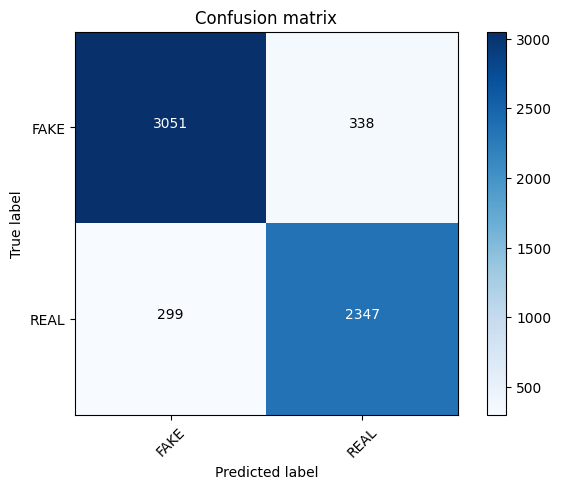

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

pred = classifier.predict(X_test_cv)

score = accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Using Passive Aggressive Classifier

accuracy: 0.921
Confusion matrix, without normalization


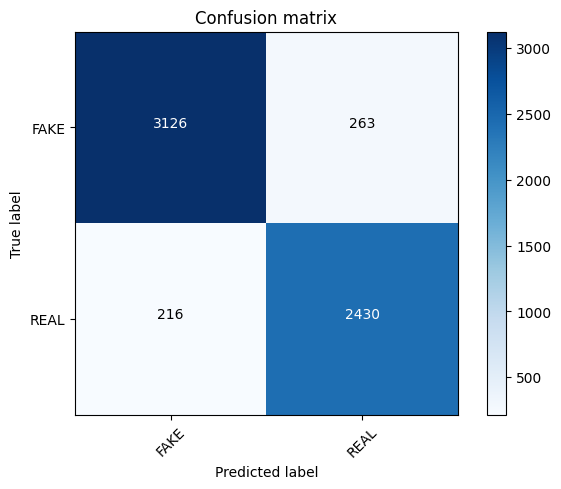

In [96]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train_cv, y_train)

pred = linear_clf.predict(X_test_cv)
score = accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Using Multinomial with Hyperparameter

In [97]:
classifier = MultinomialNB(alpha=0.1)

In [98]:
previous_score = 0
best_alpha = 0
for alpha in np.arange(0, 1, 0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train_cv, y_train)
    pred = sub_classifier.predict(X_test_cv)
    score = accuracy_score(y_test, pred)
    print("Alpha: %0.1f  -  accuracy: %0.3f" % (alpha, score))
    if score > previous_score:
        previous_score = score
        best_alpha = alpha
        classifier = sub_classifier

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0  -  accuracy: 0.562
Alpha: 0.1  -  accuracy: 0.893
Alpha: 0.2  -  accuracy: 0.893
Alpha: 0.3  -  accuracy: 0.894
Alpha: 0.4  -  accuracy: 0.895
Alpha: 0.5  -  accuracy: 0.895
Alpha: 0.6  -  accuracy: 0.895
Alpha: 0.7  -  accuracy: 0.895
Alpha: 0.8  -  accuracy: 0.895
Alpha: 0.9  -  accuracy: 0.894


In [99]:
feature_names = cv.get_feature_names_out()
feature_names

array(['ab', 'abandon', 'abandoned', ..., 'zone new york', 'zu',
       'zuckerberg'], dtype=object)

In [100]:
classifier.feature_log_prob_[0]

array([-10.89094479,  -9.59166181,  -9.7923325 , ...,  -9.42460772,
       -11.98955708,  -9.42460772])

In [101]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-2.8902600073233256, 'new'),
 (-2.937626445277644, 'time'),
 (-2.9439734341444836, 'york'),
 (-2.9442092832021807, 'new york'),
 (-2.958223764356127, 'york time'),
 (-2.958223764356127, 'new york time'),
 (-3.909010114681686, 'breitbart'),
 (-3.948144171113137, 'trump'),
 (-5.2199151036536815, 'donald'),
 (-5.226827573574305, 'donald trump'),
 (-5.764998651230824, 'say'),
 (-5.946924246823803, 'obama'),
 (-5.961278560275486, 'clinton'),
 (-6.0679786608623685, 'state'),
 (-6.1874387051291215, 'president'),
 (-6.22436597772134, 'house'),
 (-6.230655306628904, 'briefing'),
 (-6.262709332918988, 'hillary'),
 (-6.275824274996816, 'attack'),
 (-6.351202411172438, 'report')]

In [102]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-11.989557080506184, 'access pipeline protest'),
 (-11.989557080506184, 'acknowledge emf'),
 (-11.989557080506184, 'acknowledge emf damage'),
 (-11.989557080506184, 'acquitted'),
 (-11.989557080506184, 'active foreign'),
 (-11.989557080506184, 'active foreign agent'),
 (-11.989557080506184, 'adhd'),
 (-11.989557080506184, 'agent saudi'),
 (-11.989557080506184, 'agent saudi arabian'),
 (-11.989557080506184, 'al aqsa'),
 (-11.989557080506184, 'al aqsa mosque'),
 (-11.989557080506184, 'alien muslim'),
 (-11.989557080506184, 'american concerned'),
 (-11.989557080506184, 'american concerned election'),
 (-11.989557080506184, 'appear standing'),
 (-11.989557080506184, 'appear standing rock'),
 (-11.989557080506184, 'appoint'),
 (-11.989557080506184, 'aqsa'),
 (-11.989557080506184, 'aqsa mosque'),
 (-11.989557080506184, 'arabian')]